In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [194]:
dataset = pd.read_csv('heart.csv')
dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [195]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [196]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


#### Unique values of each column

In [197]:
lt = dataset.keys()
print("\n",lt,"\n")
for i in lt:
    print(i,": ",set(dataset[i]),"\n")


 Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object') 

age :  {29, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 74, 76, 77} 

sex :  {0, 1} 

cp :  {0, 1, 2, 3} 

trtbps :  {128, 129, 130, 132, 134, 135, 136, 138, 140, 142, 144, 145, 146, 148, 150, 152, 154, 155, 156, 160, 164, 165, 170, 172, 174, 178, 180, 192, 200, 94, 100, 101, 102, 104, 105, 106, 108, 110, 112, 114, 115, 117, 118, 120, 122, 123, 124, 125, 126} 

chol :  {564, 126, 131, 141, 149, 157, 160, 164, 166, 167, 168, 169, 172, 174, 175, 176, 177, 178, 180, 182, 183, 184, 185, 186, 187, 188, 192, 193, 195, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 239, 240, 24

#### Looking for duplicate rows

In [198]:
dataset[dataset.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [199]:
dataset.shape

(303, 14)

#### Removing duplicate rows

In [200]:
dataset.drop_duplicates(keep="first",inplace=True)

#### Checking shape after droppping duplicate rows

In [201]:
dataset.shape

(302, 14)

In [202]:
dataset.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [203]:
import plotly.express as px
px.imshow(dataset.corr())

In [204]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [205]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

In [206]:
print("{0}\n{1}\n{2}\n{3}\n".format(X_train,X_test,y_train,y_test))

[[60.  1.  0. ...  1.  2.  3.]
 [53.  1.  0. ...  1.  2.  3.]
 [54.  1.  2. ...  2.  0.  3.]
 ...
 [56.  1.  3. ...  1.  0.  3.]
 [47.  1.  2. ...  2.  0.  2.]
 [58.  1.  2. ...  2.  2.  3.]]
[[6.20e+01 1.00e+00 1.00e+00 1.20e+02 2.81e+02 0.00e+00 0.00e+00 1.03e+02
  0.00e+00 1.40e+00 1.00e+00 1.00e+00 3.00e+00]
 [6.40e+01 1.00e+00 3.00e+00 1.70e+02 2.27e+02 0.00e+00 0.00e+00 1.55e+02
  0.00e+00 6.00e-01 1.00e+00 0.00e+00 3.00e+00]
 [6.40e+01 1.00e+00 2.00e+00 1.25e+02 3.09e+02 0.00e+00 1.00e+00 1.31e+02
  1.00e+00 1.80e+00 1.00e+00 0.00e+00 3.00e+00]
 [5.80e+01 1.00e+00 0.00e+00 1.50e+02 2.70e+02 0.00e+00 0.00e+00 1.11e+02
  1.00e+00 8.00e-01 2.00e+00 0.00e+00 3.00e+00]
 [6.20e+01 1.00e+00 2.00e+00 1.30e+02 2.31e+02 0.00e+00 1.00e+00 1.46e+02
  0.00e+00 1.80e+00 1.00e+00 3.00e+00 3.00e+00]
 [5.60e+01 0.00e+00 0.00e+00 1.34e+02 4.09e+02 0.00e+00 0.00e+00 1.50e+02
  1.00e+00 1.90e+00 1.00e+00 2.00e+00 3.00e+00]
 [6.00e+01 1.00e+00 0.00e+00 1.17e+02 2.30e+02 1.00e+00 1.00e+00 1.60e+02
  

In [207]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [208]:
print(X_train)

[[ 0.59073308  0.71180522 -0.93409329 ... -0.6258345   1.25507175
   1.11691012]
 [-0.17970363  0.71180522 -0.93409329 ... -0.6258345   1.25507175
   1.11691012]
 [-0.06964124  0.71180522  0.96775431 ...  0.9998965  -0.71469364
   1.11691012]
 ...
 [ 0.15048353  0.71180522  1.91867811 ... -0.6258345  -0.71469364
   1.11691012]
 [-0.84007795  0.71180522  0.96775431 ...  0.9998965  -0.71469364
  -0.50117762]
 [ 0.3706083   0.71180522  0.96775431 ...  0.9998965   1.25507175
   1.11691012]]


In [209]:
print(X_test)

[[ 0.92835765  0.5976143   0.09572887 -0.62449783  0.75622933 -0.4330127
  -1.08232554 -2.36102312 -0.67936622  0.56670344 -0.70694451  0.31083919
   1.1305453 ]
 [ 1.15449605  0.5976143   2.17441298  2.29443422 -0.4189184  -0.4330127
  -1.08232554  0.19675193 -0.67936622 -0.24401583 -0.70694451 -0.71628162
   1.1305453 ]
 [ 1.15449605  0.5976143   1.13507093 -0.33260463  1.36556519 -0.4330127
   0.92393644 -0.98375963  1.47196014  0.97206308 -0.70694451 -0.71628162
   1.1305453 ]
 [ 0.47608085  0.5976143  -0.94361318  1.1268614   0.51684738 -0.4330127
  -1.08232554 -1.96751926  1.47196014 -0.04133602  0.92117012 -0.71628162
   1.1305453 ]
 [ 0.92835765  0.5976143   1.13507093 -0.04071142 -0.33187042 -0.4330127
   0.92393644 -0.24593991 -0.67936622  0.97206308 -0.70694451  2.36508082
   1.1305453 ]
 [ 0.24994244 -1.67332005 -0.94361318  0.19280314  3.54176469 -0.4330127
  -1.08232554 -0.04918798  1.47196014  1.07340299 -0.70694451  1.33796001
   1.1305453 ]
 [ 0.70221925  0.5976143  -0

In [210]:
from sklearn.metrics import confusion_matrix,accuracy_score

# Logistic Regression

In [211]:
from sklearn.linear_model import LogisticRegression
LogR = LogisticRegression()
LogR.fit(X_train,y_train)

LogR_predictions = LogR.predict(X_test)
LogR_cf = confusion_matrix(y_test,LogR_predictions)
LogR_accuracy = accuracy_score(y_test,LogR_predictions)

#### Comparing actual and predicted values

In [212]:
print("\nActual\t\tPredicted")
for i in range(len(y_test)):
    print("{0}\t\t{1}".format(y_test[i],LogR_predictions[i]))


Actual		Predicted
0		0
1		1
0		0
0		0
1		0
0		0
0		0
0		0
0		0
0		0
1		1
1		1
0		0
1		1
1		1
1		1
1		0
1		1
0		1
1		1
1		1
0		0
0		0
0		0
1		1
0		0
0		0
0		0
1		1
1		1
0		0
0		0
1		1
1		1
1		1
0		0
0		1
1		1
0		0
0		0
1		1
1		1
1		0
0		0
1		1
1		1
1		1
0		1
0		0
1		1
1		1
1		1
1		1
1		1
1		1
0		1
1		1
0		1
1		1
1		1
1		1
1		1
1		1
1		1
0		1
0		0
0		1
0		0
1		1
1		1
1		0
1		1
1		1
0		0
0		1
1		1


#### Logistic Regression Confusion Matrix

In [213]:
print(LogR_cf)

[[25  8]
 [ 4 39]]


#### Logistic Regression Accuracy

In [214]:
print("Accuracy= %.3f"%LogR_accuracy)

Accuracy= 0.842


# K Nearest Neighbors

In [215]:
from sklearn.neighbors import KNeighborsClassifier


In [216]:
test_scores = []
for i in range(1,20):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train,y_train)
    KNN_predictions = KNN.predict(X_test)
    test_scores.append(accuracy_score(y_test,KNN_predictions))

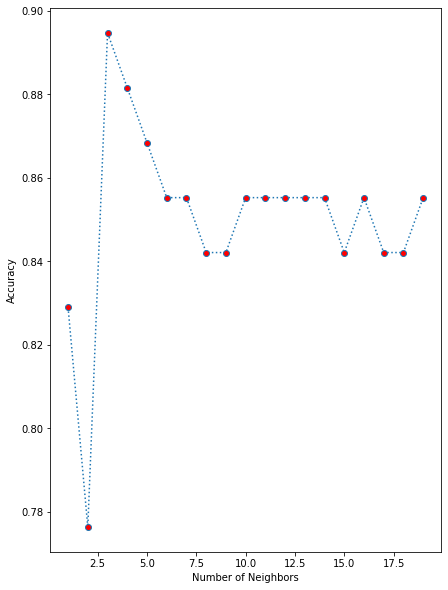

In [217]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,10))
plt.plot(range(1,20),test_scores,linestyle="dotted",marker='o',markerfacecolor='red')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [238]:
import plotly.express as px
fig = px.scatter(y=test_scores,x=range(1,20))
fig.update_layout(title='Finding optimal number of neighbors', xaxis_title='Number of Neighbors',yaxis_title='Accuracy')
fig.show()

In [229]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train,y_train)
KNN_predictions = KNN.predict(X_test)
KNN_cf = confusion_matrix(y_test,KNN_predictions)
KNN_accuracy = accuracy_score(y_test,KNN_predictions)

#### KNN actual vs predicted results

In [230]:
print("\nActual\t\tPredicted")
for i in range(len(y_test)):
    print("{0}\t\t{1}".format(y_test[i],LogR_predictions[i]))


Actual		Predicted
0		0
1		1
0		0
0		0
1		0
0		0
0		0
0		0
0		0
0		0
1		1
1		1
0		0
1		1
1		1
1		1
1		0
1		1
0		1
1		1
1		1
0		0
0		0
0		0
1		1
0		0
0		0
0		0
1		1
1		1
0		0
0		0
1		1
1		1
1		1
0		0
0		1
1		1
0		0
0		0
1		1
1		1
1		0
0		0
1		1
1		1
1		1
0		1
0		0
1		1
1		1
1		1
1		1
1		1
1		1
0		1
1		1
0		1
1		1
1		1
1		1
1		1
1		1
1		1
0		1
0		0
0		1
0		0
1		1
1		1
1		0
1		1
1		1
0		0
0		1
1		1


#### KNN Confusion Matrix

In [231]:
print(KNN_cf)

[[30  3]
 [ 5 38]]


#### KNN Accuracy

In [232]:
print("Accuracy= %.3f"%KNN_accuracy)

Accuracy= 0.895
